## Track Features EDA
 

In [1]:
import pandas as pd
import numpy as np
import re
import swifter #used to make pd.apply more efficient
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn

import warnings
warnings.filterwarnings('ignore')

In [78]:
tracks_df = pd.read_csv('/Users/mariamtamer/VSCodeProjects/lyricalanalysis/data/all_tracks_cleaned.csv')

In [26]:
tracks_df.head()

,track_uri,track_name,cleaned_track_name,track_artists,featured_artists,track_is_explicit,track_popularity,track_genres,track_duration_ms,track_time_signature,...,track_valence,track_lyrics,lyrics_page_views,track_number,album_name,album_artist,album_release_date,album_popularity,album_record_label,album_cover
0,spotify:track:2HSmyk2qMN8WQjuGhaQgCk,Champagne Poetry,Champagne Poetry,"('Drake',)",NaN,True,82,"('hip hop', 'pop', 'rap')",336511,4.0,...,0.496,"Champagne Poetry Lyrics\n\nI love you, I love ...",688853.0,1,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
1,spotify:track:6jy9yJfgCsMHdu2Oz4BGKX,Papi’s Home,Papi’s Home,"('Drake',)",NaN,True,76,"('hip hop', 'pop', 'rap')",178623,4.0,...,0.588,Papi’s Home Lyrics\nI know that I hurt you\nYe...,445883.0,2,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
2,spotify:track:37Nqx7iavZpotJSDXZWbJ3,Girls Want Girls (with Lil Baby),NaN,"('Drake', 'Lil Baby')",NaN,True,86,"('hip hop', 'pop', 'rap', 'trap')",221979,4.0,...,0.381,NaN,NaN,3,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
3,spotify:track:61S79KIVA4I9FXbnsylEHT,In The Bible (with Lil Durk & Giveon),In The Bible,"('Drake', 'Lil Durk', 'Giveon')","('GIVĒON', 'Lil Durk')",True,79,"('hip hop', 'pop', 'rap', 'drill', 'trap', 'r&b')",296568,4.0,...,0.147,"In The Bible Lyrics\nOkay, okay, okay\nCountin...",439186.0,4,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
4,spotify:track:4VCbgIdr8ptegWeJpqLVHH,Love All (with JAY-Z),NaN,"('Drake', 'JAY-Z')",NaN,True,77,"('hip hop', 'pop', 'rap')",228461,4.0,...,0.155,NaN,NaN,5,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...


The first graph which was created represents the top 10 artists with the most tracks on spotify, which is represented using a bar graph. From this we can see that Louis Armstrong had the most tracks, and there is a huge drop off after the top 4 artists. 
Representing this data as a pie chart may make the data easier to understand as there can be percentages to understand the difference in the occurences.

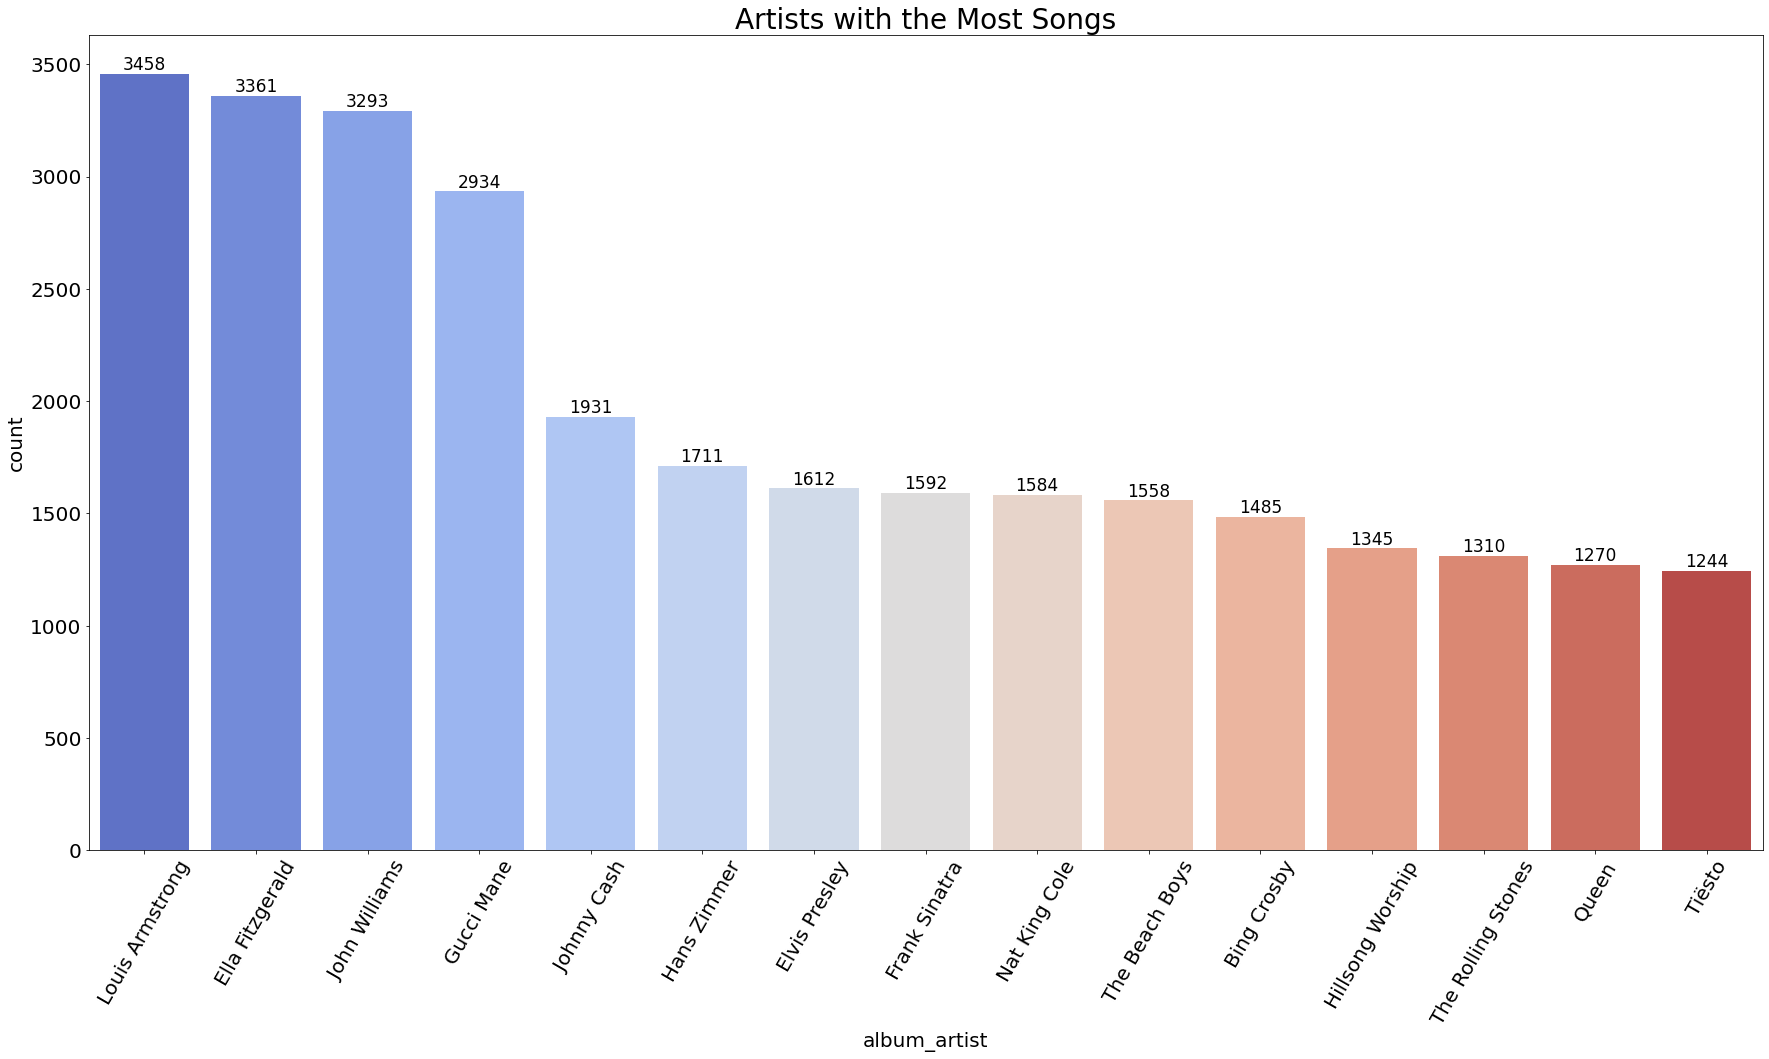

In [27]:
plt.figure(figsize=(30,15))
plt.title('Artists with the Most Songs',fontsize=28)
plt.xlabel('Artist', fontsize=20)
plt.ylabel('Count', fontsize=20)

ax = seaborn.countplot(tracks_df.album_artist,order=pd.value_counts(tracks_df.album_artist).iloc[:15].index,palette=seaborn.color_palette("coolwarm", 15))
ax.bar_label(ax.containers[0], fontsize=17)
plt.xticks(size=20,rotation=60)
plt.yticks(size=20)
#sns.despine(bottom=True, left=True)
plt.show()

Now that the data is represented as a pie chart, the difference in the occurences can be seen more clearly.

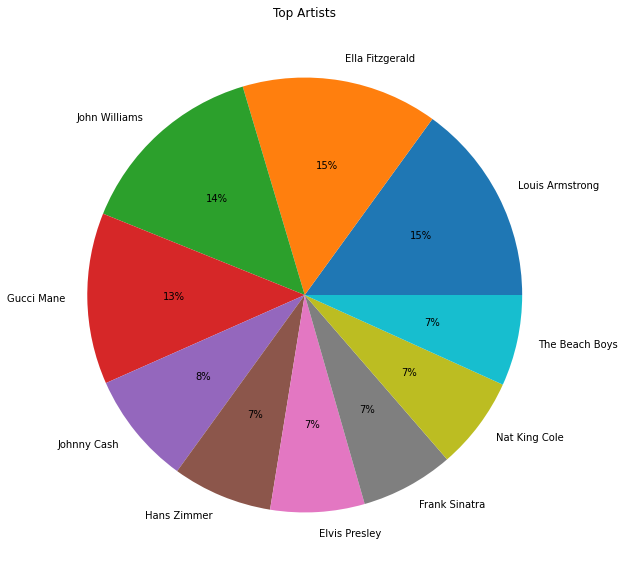

In [34]:
fig, ax = plt.subplots(figsize = (20,12))
tracks_df['album_artist'].value_counts().head(10).plot.pie(figsize=(15,10), autopct='%1.0f%%', title = "Top Artists", ylabel = "")
fig.set_facecolor('white')


In [28]:
tracks_df["top_genre"] = tracks_df.track_genres.str.split(',').str.get(0)

In [29]:
tracks_df["top_genre"] = tracks_df["top_genre"].str.replace('(', '').str.replace("'","").str.replace(')', '')

The second quesiton to be answered is what genres do people enjoy listening to, this will be represented as a graph and pie chart of the top 10 genres. From this data, it shows that 21% of songs are rock songs, followed by hip hop. This is only taking into consideration the first genre only.

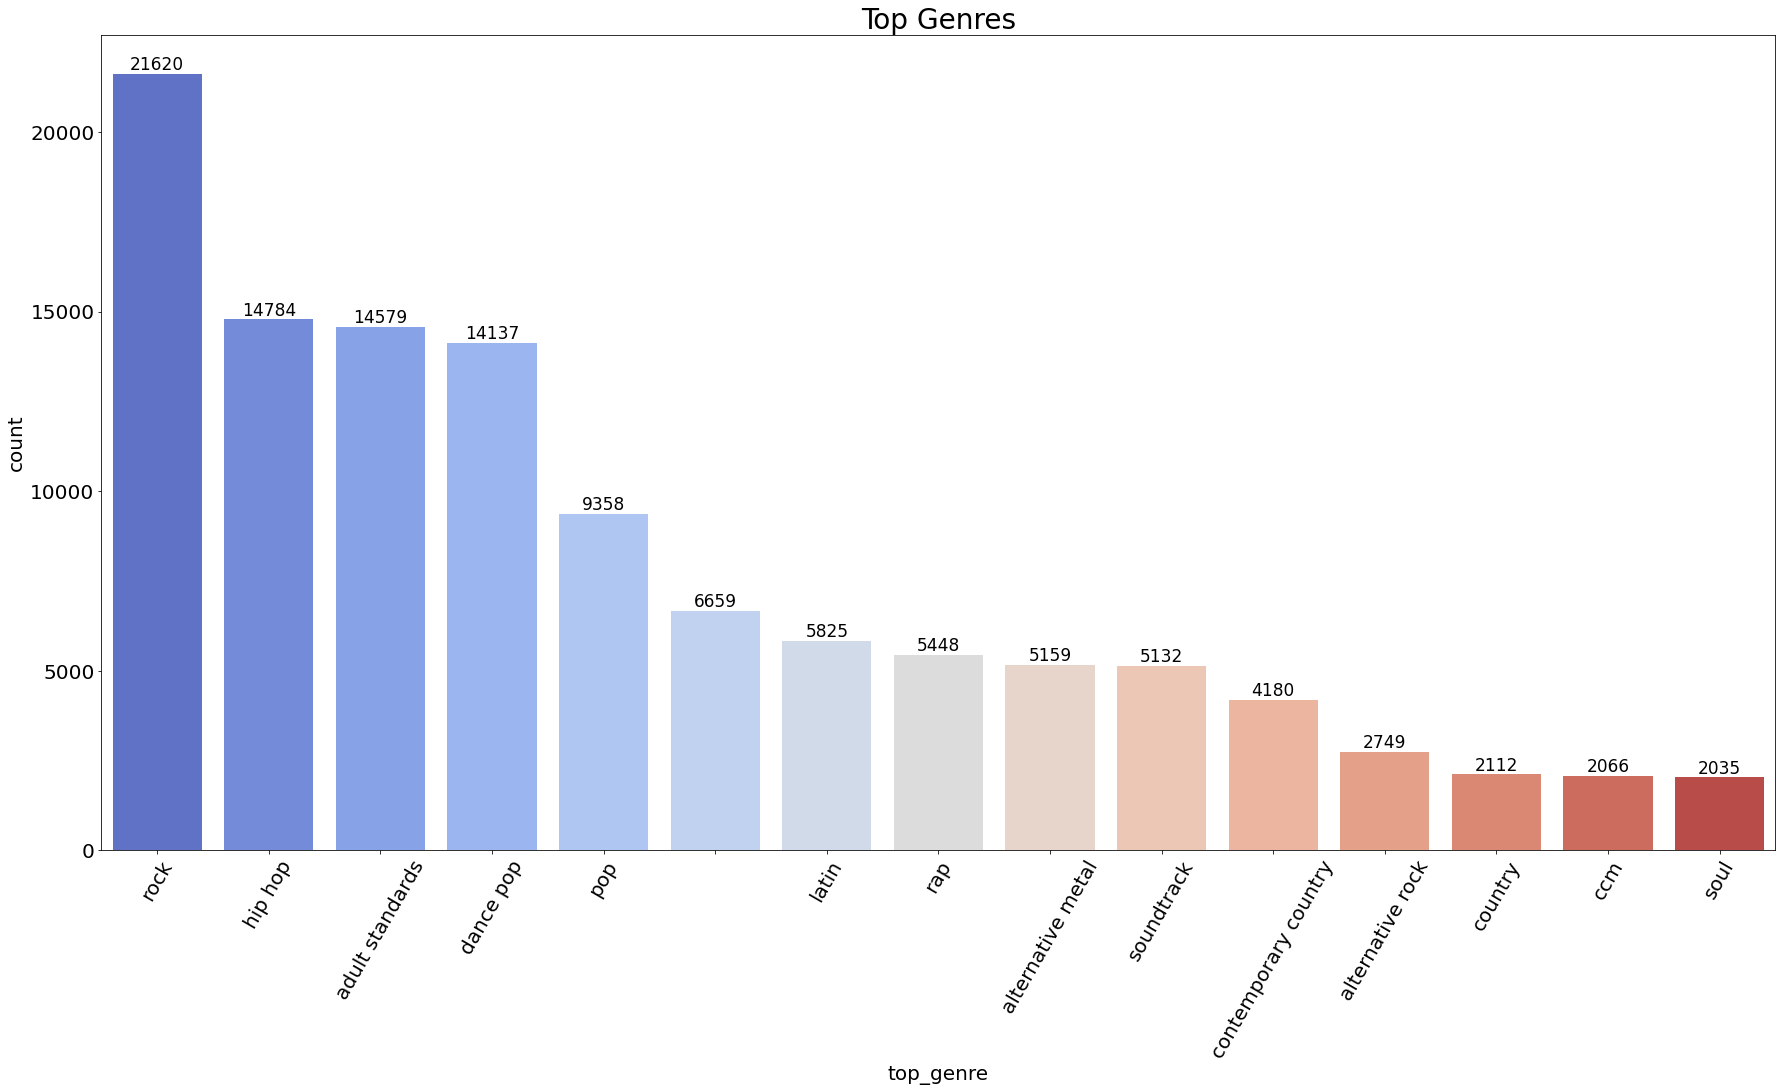

In [32]:
plt.figure(figsize=(30,15))
plt.title('Top Genres',fontsize=28)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Count', fontsize=20)

ax = seaborn.countplot(tracks_df.top_genre,order=pd.value_counts(tracks_df.top_genre).iloc[:15].index,palette=seaborn.color_palette("coolwarm", 15))
ax.bar_label(ax.containers[0], fontsize=17)
plt.xticks(size=20,rotation=60)
plt.yticks(size=20)
#sns.despine(bottom=True, left=True)
plt.show()

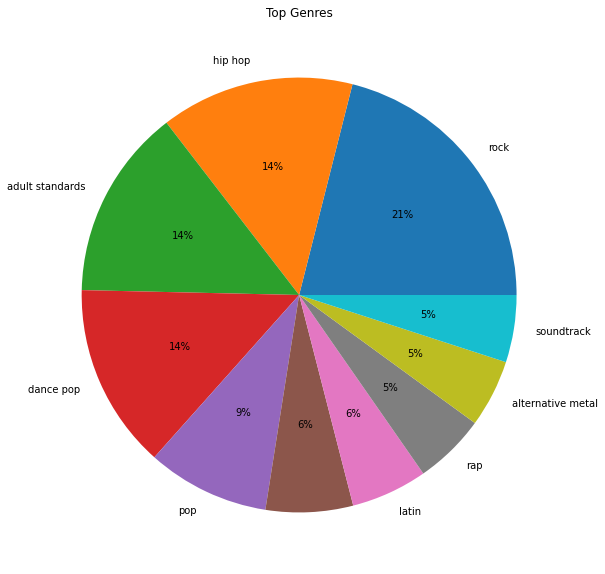

In [35]:
fig, ax = plt.subplots(figsize = (20,12))
tracks_df['top_genre'].value_counts().head(10).plot.pie(figsize=(15,10), autopct='%1.0f%%', title = "Top Genres", ylabel = "")
fig.set_facecolor('white')

Now, moving onto the top 10 record labels. Record labels are important when artists are first publishing a song, as it can affect the popularity of a song related to the marketing. Record labels also hold rights to the song. From the pie chart, it shows that 20% of the data are published by Columbia records.

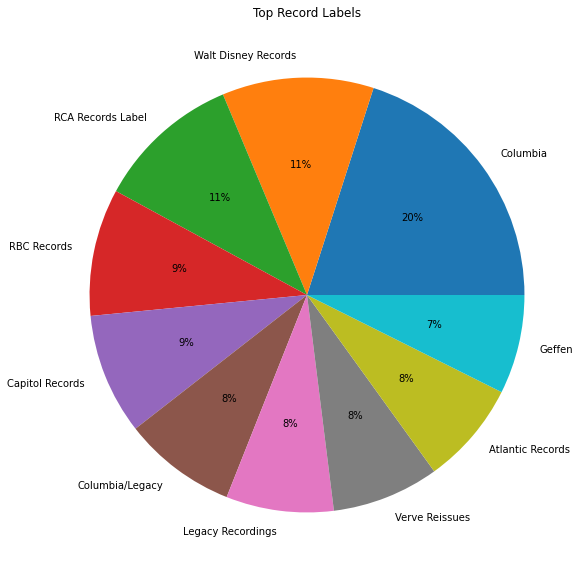

In [36]:
fig, ax = plt.subplots(figsize = (20,12))
tracks_df['album_record_label'].value_counts().head(10).plot.pie(figsize=(15,10), autopct='%1.0f%%', title = "Top Record Labels", ylabel = "")
fig.set_facecolor('white')

Seeing which key signature is most frequently used can help understand what key signature people prefer when listening to music as it can affect the perception of the song. From the pie chart, it shows that the most popular key signature is C Major

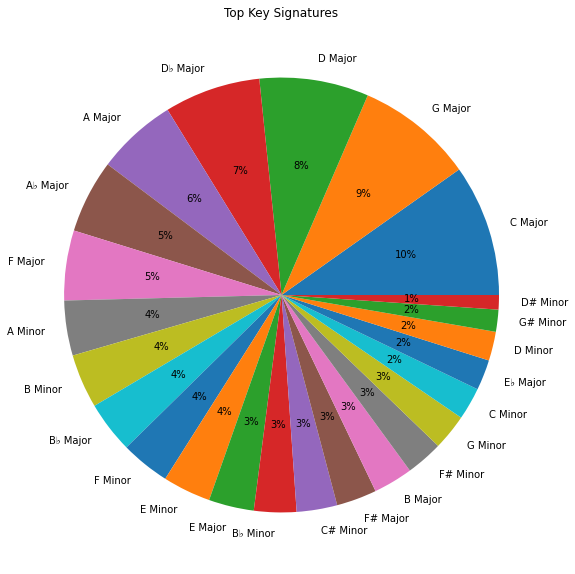

In [37]:
fig, ax = plt.subplots(figsize = (20,12))
tracks_df['track_key_signature'].value_counts().plot.pie(figsize=(15,10), autopct='%1.0f%%', title = "Top Key Signatures", ylabel = "")
fig.set_facecolor('white')

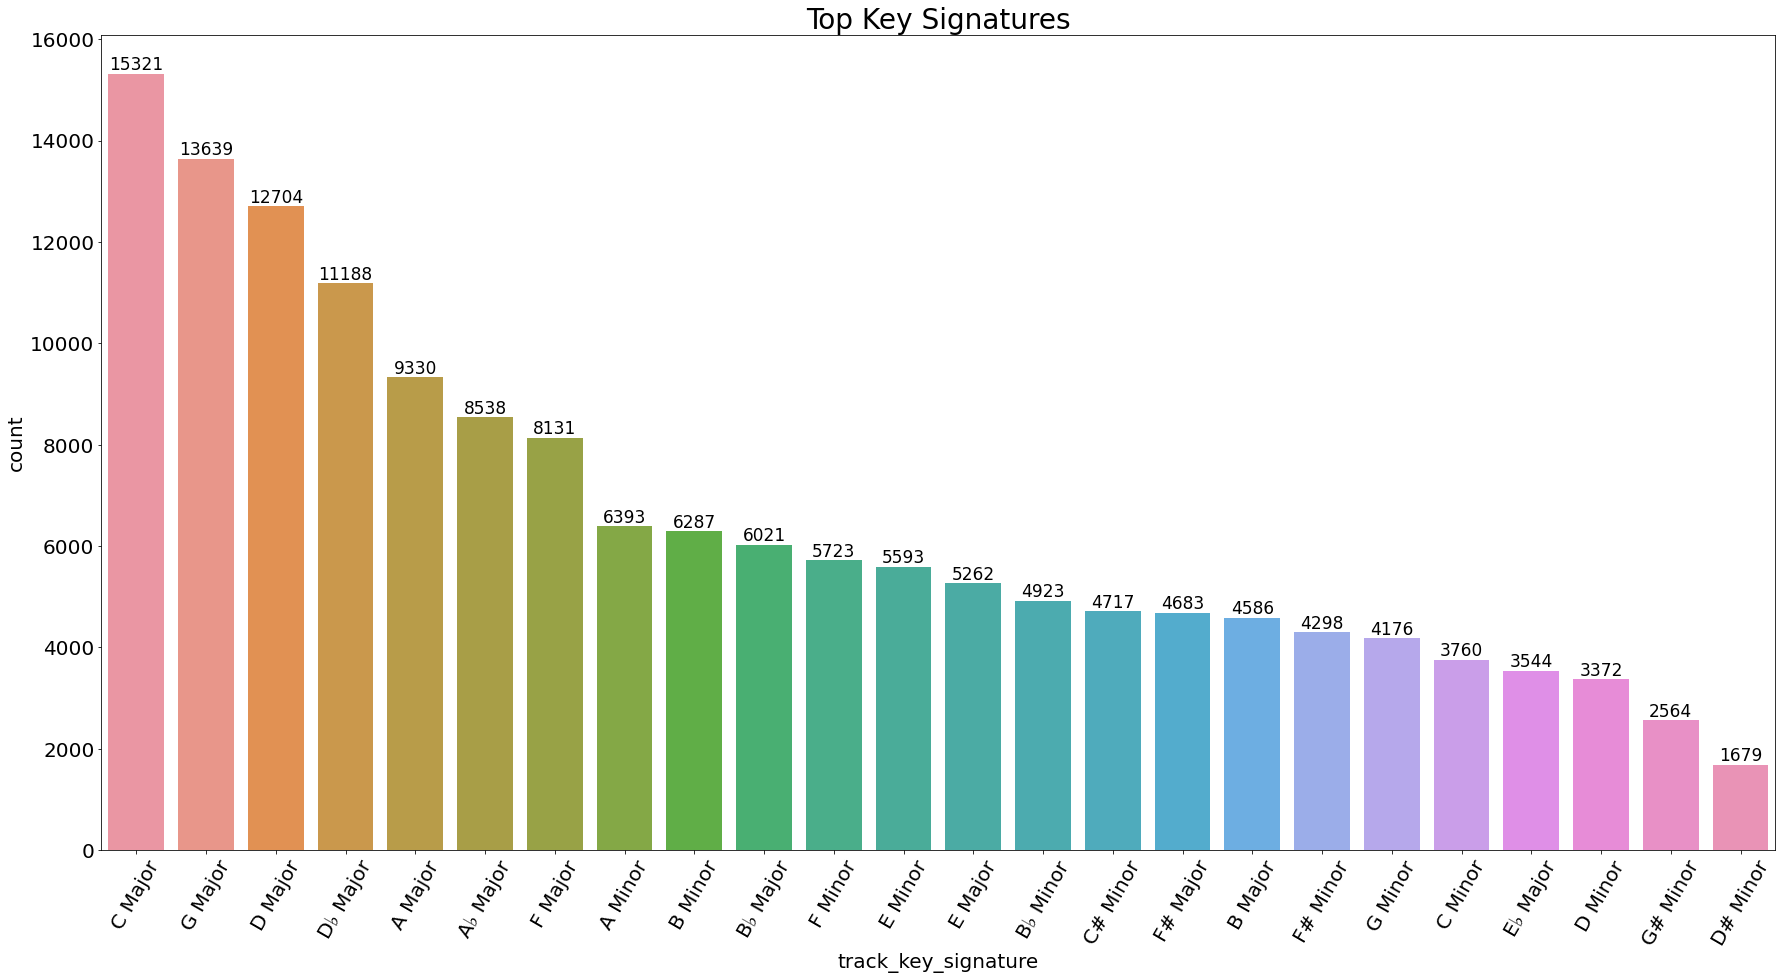

In [151]:
plt.figure(figsize=(30,15))
plt.title('Top Key Signatures',fontsize=28)
plt.xlabel('Key Signatures', fontsize=20)
plt.ylabel('Count', fontsize=20)

ax = seaborn.countplot(tracks_df.track_key_signature,order=pd.value_counts(tracks_df.track_key_signature).iloc[:24].index)
ax.bar_label(ax.containers[0], fontsize=17)
plt.xticks(size=20,rotation=60)
plt.yticks(size=20)
#sns.despine(bottom=True, left=True)
plt.show()

The next graph to be made is to show which year had the most album releases, and from this chart, it is clear that the past 3 years have had the most song release, which could be related to social media apps such as tiktok gaining popularity, which can help artists makret their songs.

In [38]:
tracks_df["year_release"] = tracks_df.album_release_date.str.split('-').str.get(0)

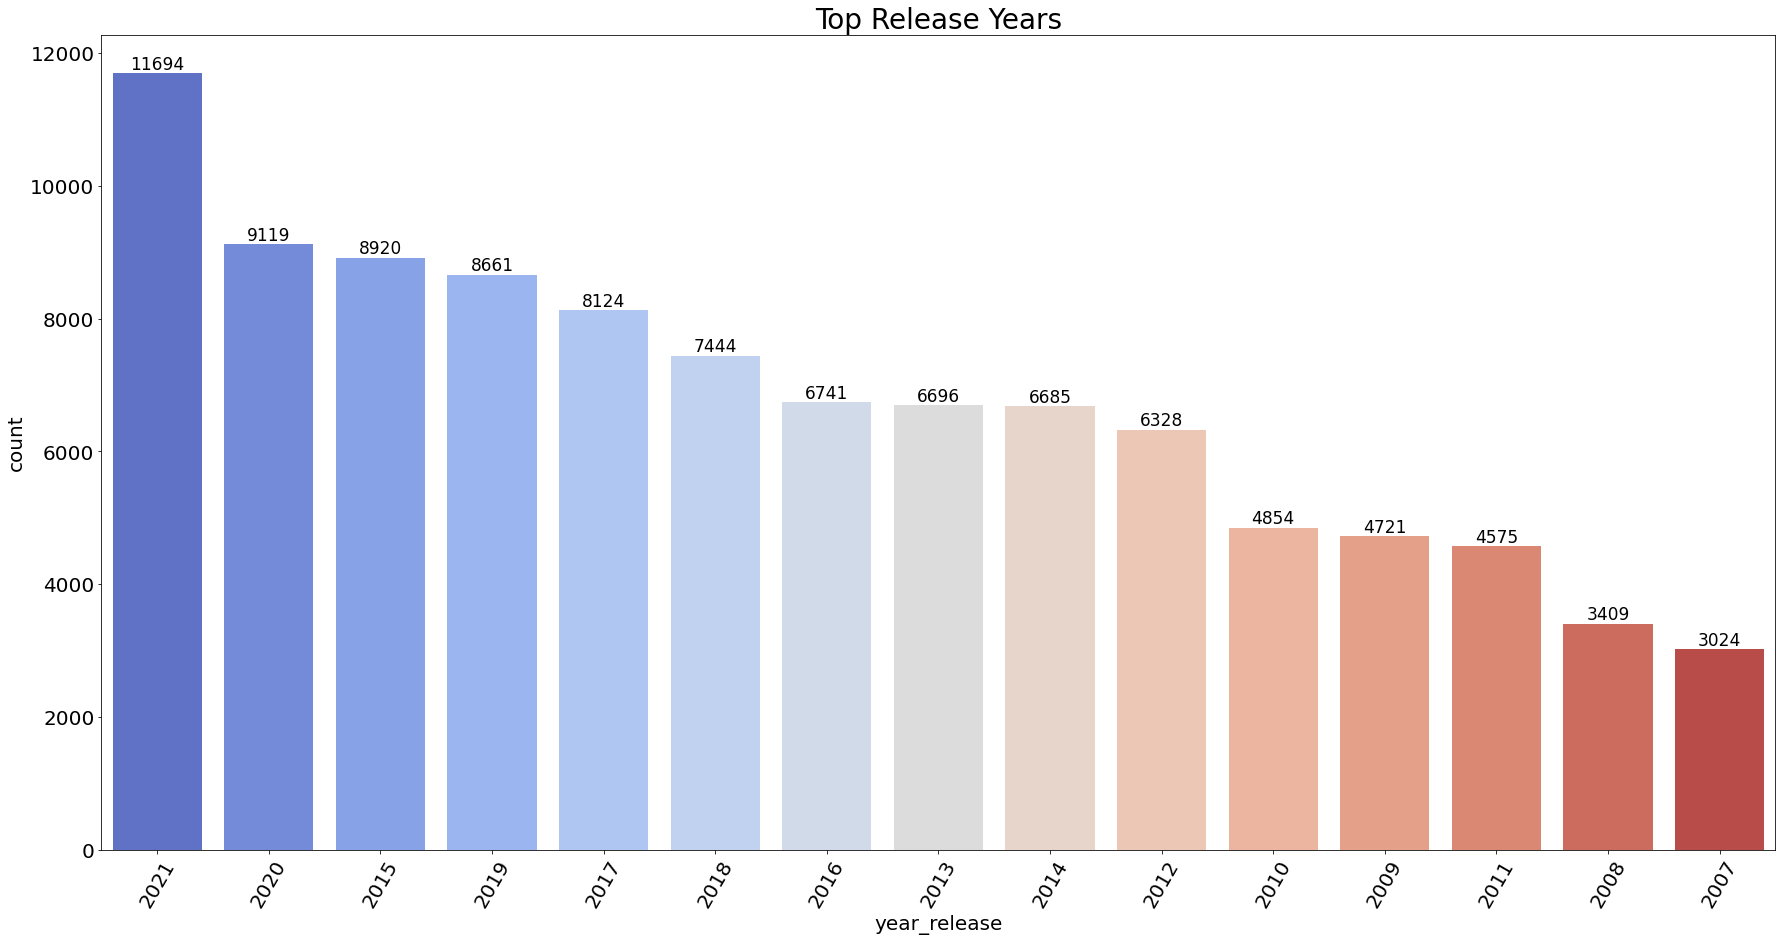

In [39]:
plt.figure(figsize=(30,15))
plt.title('Top Release Years',fontsize=28)
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

ax = seaborn.countplot(tracks_df.year_release,order=pd.value_counts(tracks_df.year_release).iloc[:15].index,palette=seaborn.color_palette("coolwarm", 15))
ax.bar_label(ax.containers[0], fontsize=17)
plt.xticks(size=20,rotation=60)
plt.yticks(size=20)
#sns.despine(bottom=True, left=True)
plt.show()

In [130]:
tracks_audio_features = tracks_df[['track_uri', 'track_name', 'track_artists', 'featured_artists', 'track_is_explicit', 'track_genres', 'track_popularity', 'track_duration_ms', 'track_time_signature', 'track_key_signature', 'track_acousticness', 
'track_danceability', 'track_energy', 'track_instrumentalness', 'track_key', 'track_mode', 'track_liveness', 'track_loudness', 'track_speechiness', 'track_tempo', 'track_valence', 
'track_number', 'album_name', 'album_artist', 'album_release_date', 'album_popularity','album_record_label']]


In [131]:
top_tracks = tracks_audio_features.sort_values('track_popularity', ascending = False).head(500)
top_tracks.head()

,track_uri,track_name,track_artists,featured_artists,track_is_explicit,track_genres,track_popularity,track_duration_ms,track_time_signature,track_key_signature,...,track_loudness,track_speechiness,track_tempo,track_valence,track_number,album_name,album_artist,album_release_date,album_popularity,album_record_label
13697,spotify:track:6Uj1ctrBOjOas8xZXGqKk4,Woman,"('Doja Cat',)",NaN,True,"[dance pop, pop]",97,172626,4.0,F Minor,...,-4.175,0.0854,107.998,0.881,1,Planet Her,Doja Cat,2021-06-25,98,Kemosabe Records/RCA Records
21272,spotify:track:0e8nrvls4Qqv5Rfa2UhqmO,THATS WHAT I WANT,"('Lil Nas X',)",NaN,True,"[hip hop, pop]",97,143901,4.0,D♭ Major,...,-7.410,0.2310,76.065,0.207,4,MONTERO,Lil Nas X,2021-09-17,95,Columbia
281,spotify:track:3rmo8F54jFF8OgYsqTxm5d,Bad Habits,"('Ed Sheeran',)",NaN,False,[pop],96,230746,4.0,B Minor,...,-3.745,0.0347,126.011,0.537,4,=,Ed Sheeran,2021-10-29,96,Atlantic Records UK
279,spotify:track:50nfwKoDiSYg8zOCREWAm5,Shivers,"('Ed Sheeran',)",NaN,False,[pop],96,207853,4.0,D Major,...,-2.724,0.0856,141.020,0.822,2,=,Ed Sheeran,2021-10-29,96,Atlantic Records UK
22762,spotify:track:4ZtFanR9U6ndgddUvNcjcG,good 4 u,"('Olivia Rodrigo',)",NaN,True,[pop],96,178146,4.0,F Minor,...,-3.449,0.0608,75.003,0.800,6,SOUR,Olivia Rodrigo,2021-05-21,100,Olivia Rodrigo PS


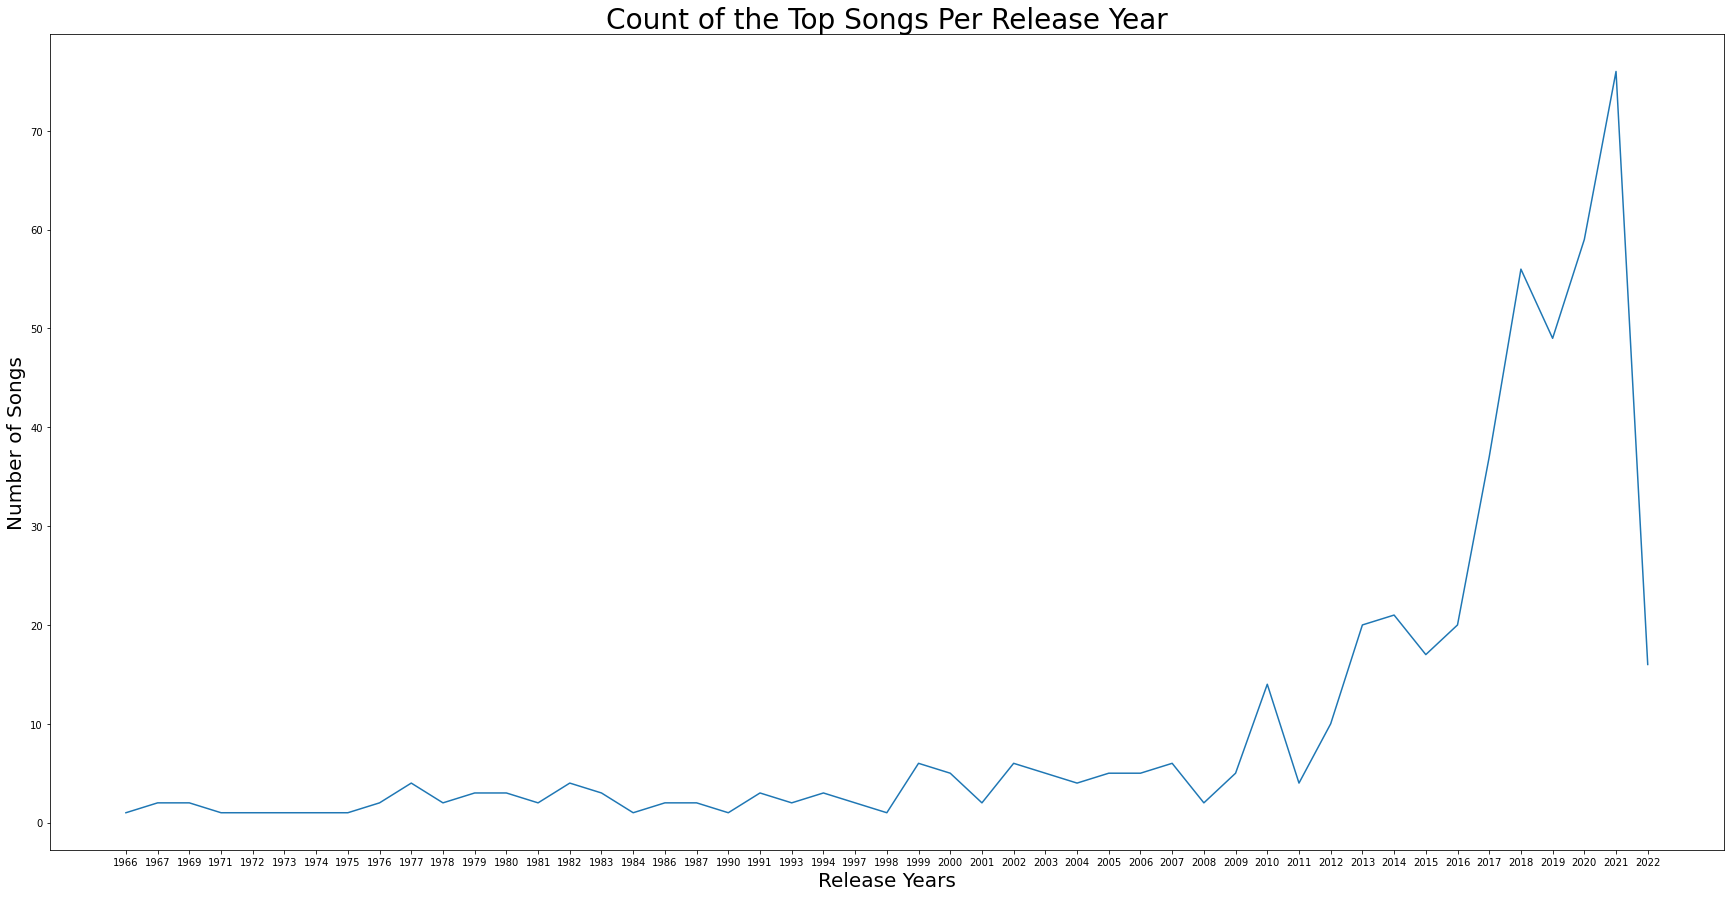

In [9]:
album_release_years = top_tracks['album_release_date'].map(lambda x: x[:4])
top_tracks['album_release_year'] = album_release_years
y = top_tracks.groupby(['album_release_year']).count()['track_uri'].values
plt.figure(figsize=(30,15))
plt.title('Count of the Top Songs Per Release Year',fontsize=28)
plt.xlabel('Release Years', fontsize=20)
plt.ylabel('Number of Songs', fontsize=20)

plt.plot(top_tracks.groupby(['album_release_year']).count().index, y)


In [12]:
describ = tracks_audio_features.describe() # assign describe to variable
null_sum = pd.concat([tracks_audio_features.isnull().sum().rename('NullData'),describ.T],axis=1)
null_sum

,NullData,count,mean,std,min,25%,50%,75%,max
track_uri,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_name,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_artists,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
featured_artists,141661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_is_explicit,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_popularity,0,156480.0,29.935493,19.590452,0.0,14.0000,29.000000,44.00000,97.000
track_duration_ms,0,156480.0,227073.490523,109823.237372,3338.0,177413.0000,214706.000000,259733.00000,4794398.000
track_time_signature,48,156432.0,3.900672,0.448843,0.0,4.0000,4.000000,4.00000,5.000
track_acousticness,48,156432.0,0.318634,0.318640,0.0,0.0375,0.192000,0.57700,0.996
track_danceability,48,156432.0,0.565730,0.179148,0.0,0.4470,0.581000,0.70000,0.980


In [ ]:
top_tracks_features = top_tracks[['track_uri', 'track_name', 'track_artists', 'featured_artists', 'track_is_explicit', 'track_genres', 'track_popularity', 'track_duration_ms', 'track_time_signature', 'track_key_signature', 'track_acousticness', 
'track_danceability', 'track_energy', 'track_instrumentalness', 'track_key', 'track_mode', 'track_liveness', 'track_loudness', 'track_speechiness', 'track_tempo', 'track_valence', 
'track_number', 'album_name', 'album_artist', 'album_release_date', 'album_popularity','album_record_label']]

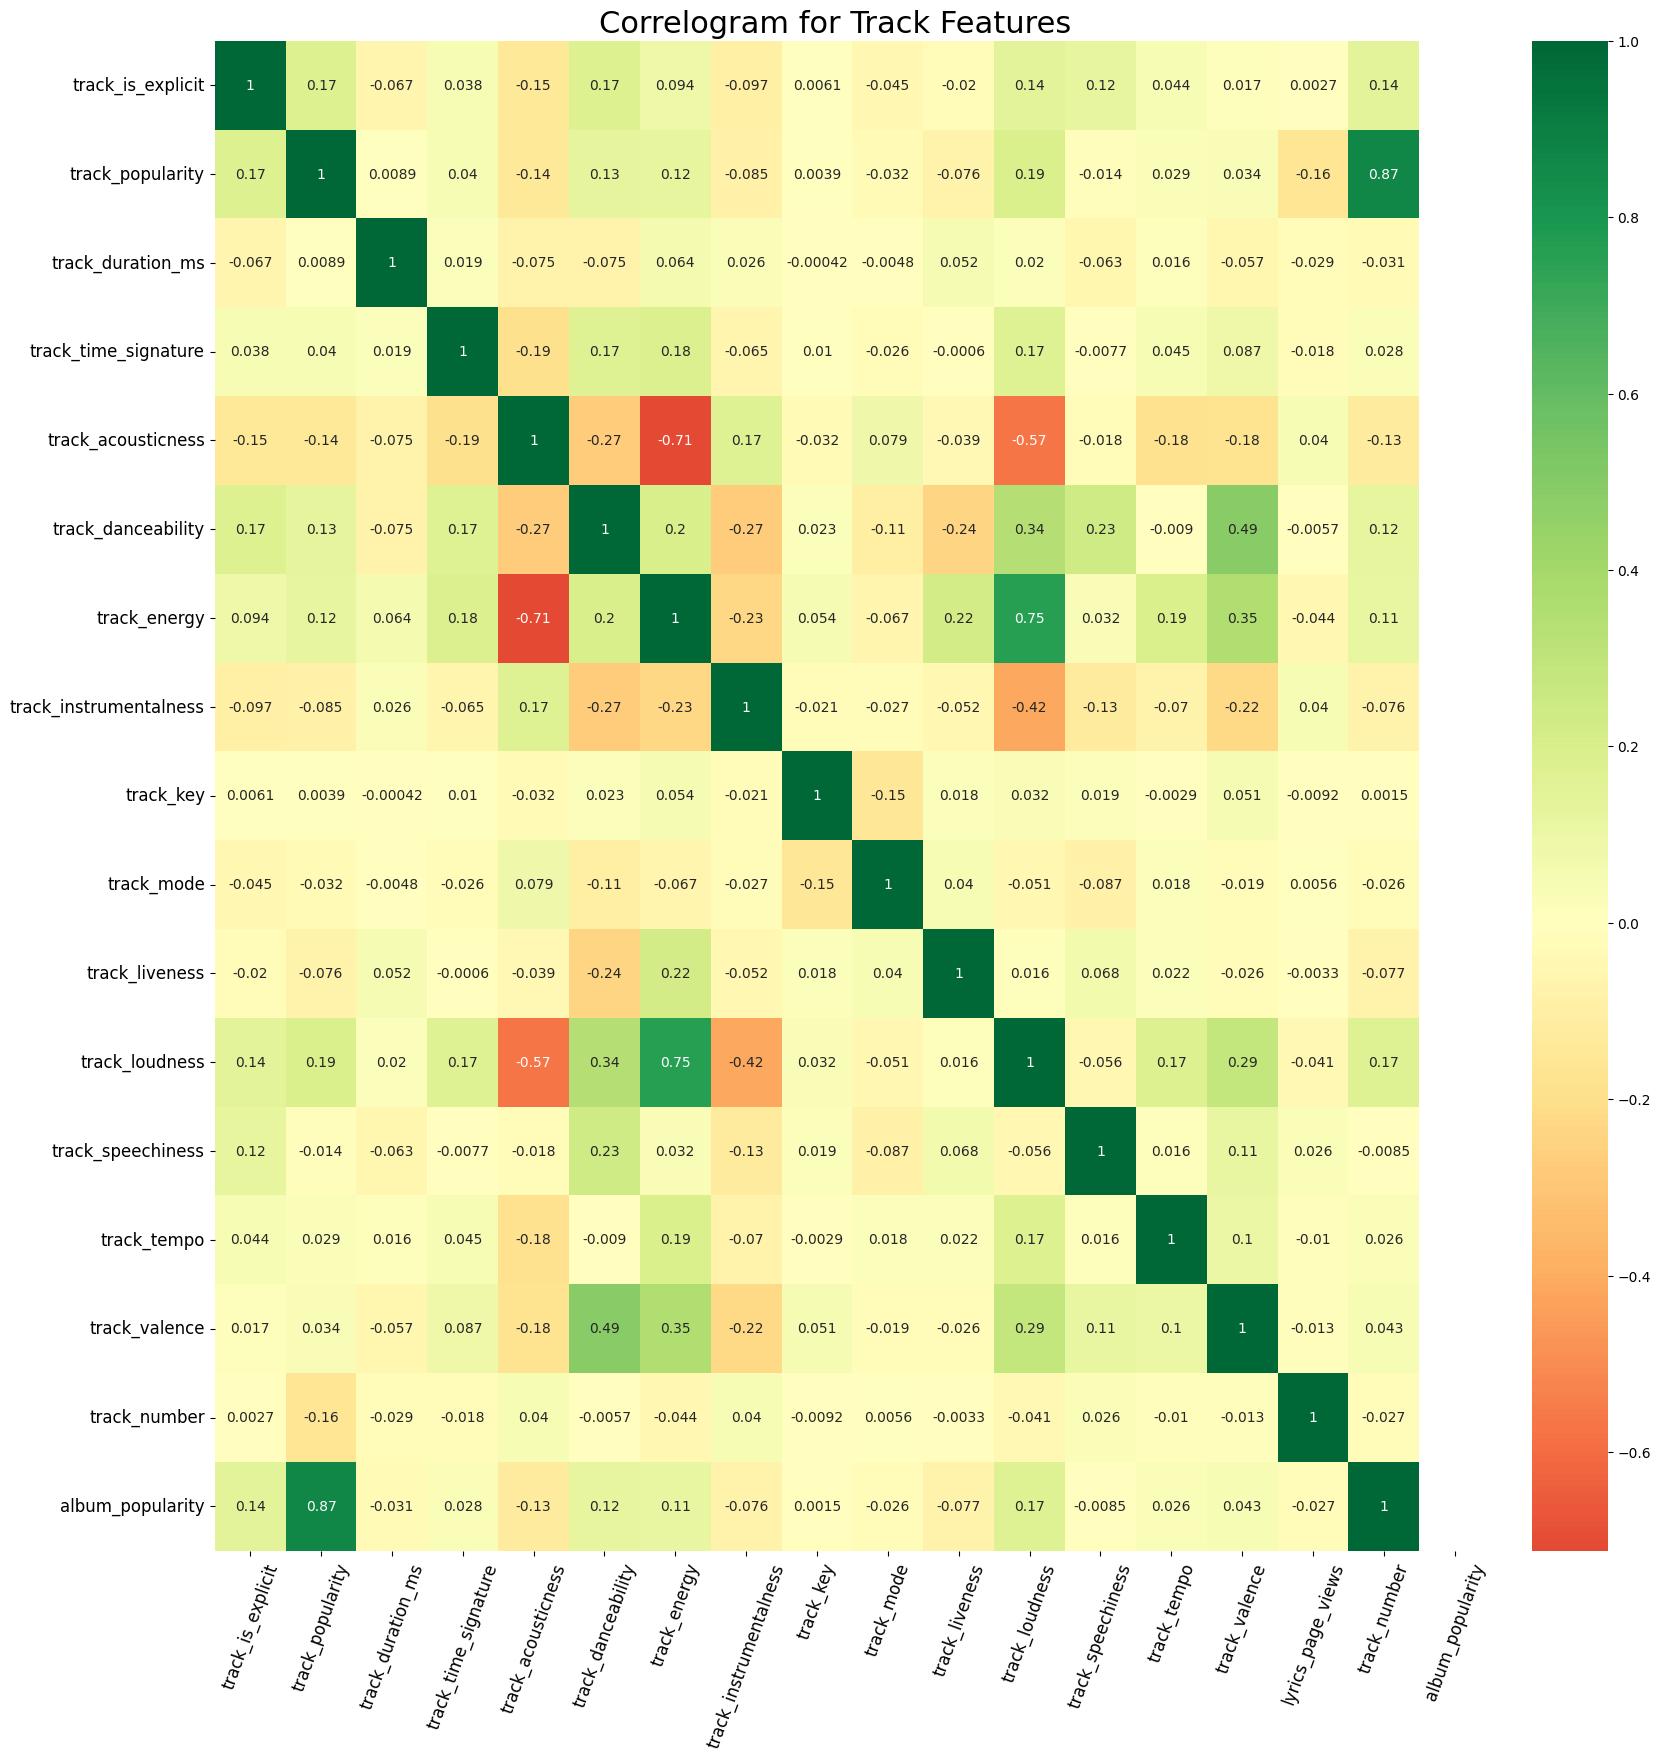

In [33]:
# Plot
plt.figure(figsize=(20,20), dpi= 100)
seaborn.heatmap(tracks_audio_features.corr(), xticklabels=tracks_audio_features.corr().columns, yticklabels=tracks_audio_features.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram for Track Features', fontsize=22)
plt.xticks(fontsize=12,rotation=70)
plt.yticks(fontsize=12)
plt.show()

In [79]:
from ast import literal_eval
tracks_df['track_genres'] = tracks_df['track_genres'].apply(literal_eval)

In [80]:
def split_genres_preprocess(genres_list):
    genres_list = list(genres_list)
    i = len(genres_list) - 1
    while len(genres_list) > 5:
        genres_list.pop(i)
        i -= 1
    return genres_list

In [81]:
tracks_df['track_genres'] = tracks_df.apply(lambda x: split_genres_preprocess(x.track_genres), axis=1)
tracks_df[['track_genres']]

,track_genres
0,"[hip hop, pop, rap]"
1,"[hip hop, pop, rap]"
2,"[hip hop, pop, rap, trap]"
3,"[hip hop, pop, rap, drill, trap]"
4,"[hip hop, pop, rap]"
...,...
156475,"[boy band, dance pop, europop]"
156476,"[boy band, dance pop, europop]"
156477,"[boy band, dance pop, europop]"
156478,"[boy band, dance pop, europop]"


In [84]:
split_genres = tracks_df.copy()
split_genres[['track_genre_1', 'track_genre_2', 'track_genre_3', 'track_genre_4', 'track_genre_5']] = pd.DataFrame(split_genres['track_genres'].tolist(), index=split_genres.index).fillna(np.nan)
split_genres[['track_genre_1', 'track_genre_2', 'track_genre_3', 'track_genre_4', 'track_genre_5']] 


,track_genre_1,track_genre_2,track_genre_3,track_genre_4,track_genre_5
0,hip hop,pop,rap,NaN,NaN
1,hip hop,pop,rap,NaN,NaN
2,hip hop,pop,rap,trap,NaN
3,hip hop,pop,rap,drill,trap
4,hip hop,pop,rap,NaN,NaN
...,...,...,...,...,...
156475,boy band,dance pop,europop,NaN,NaN
156476,boy band,dance pop,europop,NaN,NaN
156477,boy band,dance pop,europop,NaN,NaN
156478,boy band,dance pop,europop,NaN,NaN


There is a lot of data getting lost by having to divide the dataframe this way so after recognizing that a better suited approach for the analysis was to find a way to get the count of the data instead. This was done using the counter from the collections library.

In [90]:
from collections import Counter

def make_genre_dictionary(df_column):
    freq_list = []
    for genre in df_column:
        freq_list.extend(genre)
    freq_counts = Counter(freq_list)
    return freq_counts
freq_counts_dict = dict(sorted(make_genre_dictionary(tracks_df.track_genres).items(), key=lambda x: x[1], reverse=True))

In [124]:
genres_df = pd.DataFrame(index=list(freq_counts_dict.keys()), data={
        "Count": list(freq_counts_dict.values()),
    })

In [119]:
genres_df

,Genres,Count
0,pop,40829
1,rock,39887
2,hip hop,24880
3,rap,23823
4,dance pop,21732
...,...,...
223,mandopop,1
224,zhongguo feng,1
225,opera,1
226,post-minimalism,1


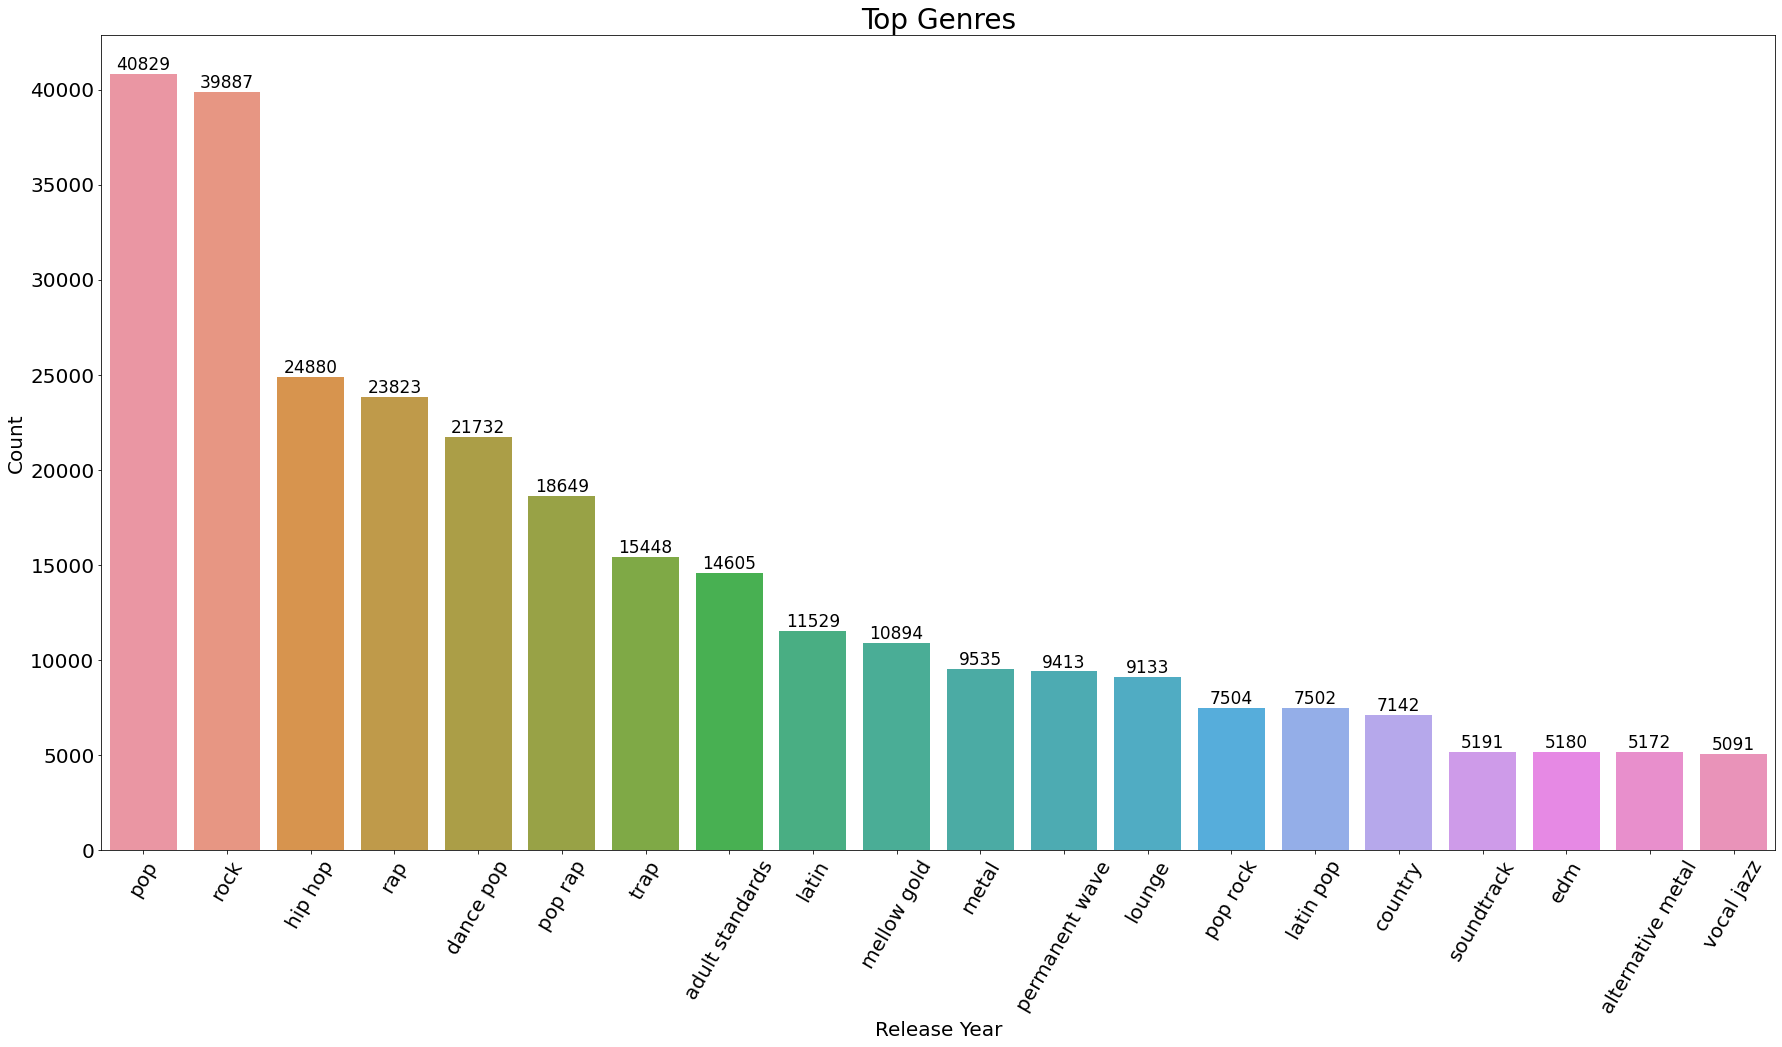

In [129]:
plt.figure(figsize=(30,15))
plt.title('Top Genres',fontsize=28)
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

ax = seaborn.barplot(x=genres_df.head(20).index, y="Count", data=genres_df.head(20))
ax.bar_label(ax.containers[0], fontsize=17)
plt.xticks(size=20,rotation=60)
plt.yticks(size=20)
#sns.despine(bottom=True, left=True)
plt.show()

In [153]:
print('Tracks Released for the top 20 Genres per Year: \n')

for track_genre in genres_df.head(20).index:
    genre = tracks_df['track_genres'].str.contains(genre).fillna(False)
    plt.figure()
    plt.xlabel('Release Year')
    plt.ylabel('Number of Songs Released')
    plt.title(str(track_genre))
    tracks_df[genre].album_release_year.value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, rot=45)
    print(track_genre, len(tracks_df[genre]))

Tracks Released for the top 20 Genres per Year: 



NameError: name 'genre' is not defined

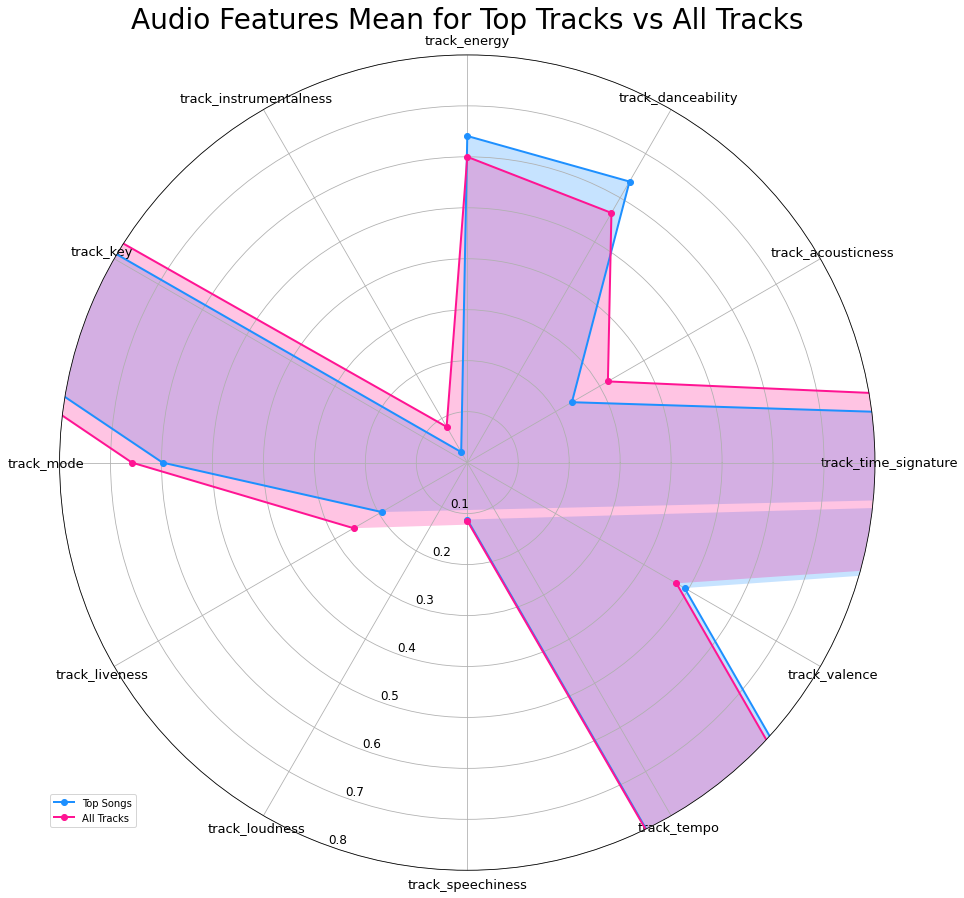

In [148]:
feature_labels = list(top_tracks_features)[:]
top_tracks_features_mean = top_tracks_features.mean().tolist()
all_track_features_mean = all_tracks_features.mean().tolist()

graph_angles = np.linspace(0, 2*np.pi, len(feature_labels), endpoint=False)
fig, ax = plt.subplots(figsize=(20,15), subplot_kw={'projection': 'polar'})
plt.title('Audio Features Mean for Top Tracks vs All Tracks',fontsize=28)

ax.plot(graph_angles, top_tracks_features_mean, 'o-', linewidth=2, label = "Top Songs", color= 'dodgerblue')
ax.fill(graph_angles, top_tracks_features_mean, alpha=0.25, facecolor='dodgerblue')
ax.set_thetagrids(graph_angles * 180/np.pi, feature_labels , fontsize = 13)

ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7, 0.8, 0.9, 1.0], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7', '0.8', '0.9', '1.0'], size=12)
plt.ylim(0,0.8)

ax.plot(graph_angles, all_track_features_mean, 'o-', linewidth=2, label = "All Tracks", color= 'deeppink')
ax.fill(graph_angles, all_track_features_mean, alpha=0.25, facecolor='deeppink')
ax.grid(True)

plt.legend(bbox_to_anchor=(0.1, 0.1))
#orange, dodgerblue, deeppink, g

In [ ]:
def time_in_minutes(duration):
    seconds = duration/1000
    minutes = seconds/60
    return minutes

tracks_audio_features['track_duration_minutes'] = tracks_audio_features['track_duration_ms'].map(time_in_minutes)
tracks_audio_features.head()

/var/folders/58/js6pcsmx285bmrndbqrmgcqm0000gn/T/ipykernel_2589/1394044108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_audio_features['track_duration_minutes'] = tracks_audio_features['track_duration_ms'].map(time_in_minutes)


,track_uri,track_name,track_artists,featured_artists,track_is_explicit,track_popularity,track_duration_ms,track_time_signature,track_acousticness,track_danceability,...,track_speechiness,track_tempo,track_valence,track_number,album_name,album_artist,album_release_date,album_popularity,album_record_label,track_duration_minutes
0,spotify:track:2HSmyk2qMN8WQjuGhaQgCk,Champagne Poetry,"('Drake',)",NaN,True,82,336511,4.0,0.758,0.423,...,0.326,86.743,0.496,1,Certified Lover Boy,Drake,2021-09-03,95,OVO,5.608517
1,spotify:track:6jy9yJfgCsMHdu2Oz4BGKX,Papi’s Home,"('Drake',)",NaN,True,76,178623,4.0,0.112,0.701,...,0.313,140.177,0.588,2,Certified Lover Boy,Drake,2021-09-03,95,OVO,2.977050
2,spotify:track:37Nqx7iavZpotJSDXZWbJ3,Girls Want Girls (with Lil Baby),"('Drake', 'Lil Baby')",NaN,True,86,221979,4.0,0.181,0.767,...,0.290,86.975,0.381,3,Certified Lover Boy,Drake,2021-09-03,95,OVO,3.699650
3,spotify:track:61S79KIVA4I9FXbnsylEHT,In The Bible (with Lil Durk & Giveon),"('Drake', 'Lil Durk', 'Giveon')","('GIVĒON', 'Lil Durk')",True,79,296568,4.0,0.614,0.686,...,0.297,143.070,0.147,4,Certified Lover Boy,Drake,2021-09-03,95,OVO,4.942800
4,spotify:track:4VCbgIdr8ptegWeJpqLVHH,Love All (with JAY-Z),"('Drake', 'JAY-Z')",NaN,True,77,228461,4.0,0.354,0.730,...,0.287,92.131,0.155,5,Certified Lover Boy,Drake,2021-09-03,95,OVO,3.807683
